# Bài tập 1

In [47]:
!gdown 147FUijJc2yuu5S5CEDOx46vElUDGhAhE

Downloading...
From: https://drive.google.com/uc?id=147FUijJc2yuu5S5CEDOx46vElUDGhAhE
To: /content/advertising.csv
100% 4.06k/4.06k [00:00<00:00, 12.6MB/s]


In [48]:
import numpy as np
from numpy import genfromtxt

# Load dataset
data = genfromtxt('advertising.csv', delimiter=',', skip_header=1)
N = data.shape[0]
X = data[:, :3]
y = data[:, 3:]

# Normalize input data using mean normalization
def mean_normalization(X):
    N = len(X)
    maxi = np.max(X)
    mini = np.min(X)
    avg = np.mean(X)
    X = (X - avg) / (maxi - mini)
    X_b = np.c_[np.ones((N, 1)), X]
    return X_b, maxi, mini, avg

# Apply mean normalization to the dataset
X_b, maxi, mini, avg = mean_normalization(X)

In [49]:
def stochastic_gradient_descent(X_b, y, n_epochs=50, learning_rate=0.00001):
    # thetas = np.random.randn(4, 1) # uncomment this line for real application
    thetas = np.asarray([[1.16270837], [-0.81960489], [1.39501033], [0.29763545]])

    thetas_path = [thetas]
    losses = []

    for epoch in range(n_epochs):
        for i in range(len(X_b)):
            # select random number in N
            # random_index = np.random.randint(N) #In real application, you should use this code
            random_index = i  # This code is used for this assignment only

            xi = X_b[random_index:random_index+1]
            yi = y[random_index:random_index+1]

            # Compute output
            output = xi.dot(thetas)

            # Compute loss
            loss = (output - yi) ** 2 / 2

            # Compute gradient for loss
            gradient = xi.T.dot(output - yi)

            # Update theta
            thetas = thetas - learning_rate * gradient

            # Logging
            thetas_path.append(thetas)
            losses.append(loss[0, 0])  # Store the scalar loss value

    return thetas_path, losses

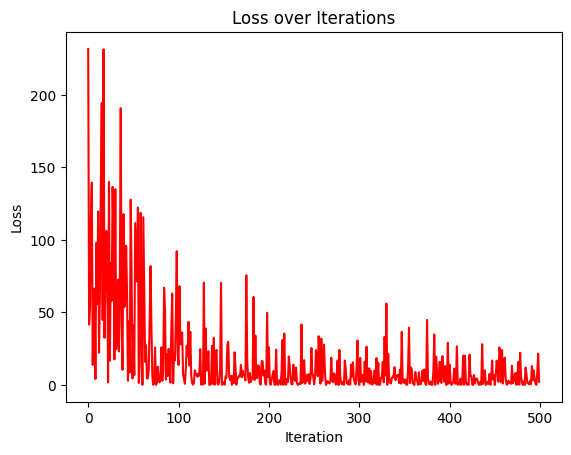

In [50]:
from matplotlib import pyplot as plt

# Perform stochastic gradient descent
sgd_theta, losses = stochastic_gradient_descent(X_b, y, n_epochs=50, learning_rate=0.01)

# Plot the losses
x_axis = list(range(500))
plt.plot(x_axis, losses[:500], color="r")
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss over Iterations')
plt.show()

In [51]:
# Perform stochastic gradient descent for 1 epoch with a learning rate of 0.01
sgd_theta, losses = stochastic_gradient_descent(X_b, y, n_epochs=1, learning_rate=0.01)

# Print the sum of the losses
print(np.sum(losses))

6754.643359356192


In [52]:
def mini_batch_gradient_descent(X_b, y, n_epochs=50, minibatch_size=20, learning_rate=0.01):
    # thetas = np.random.randn(4, 1) # uncomment this line for real application
    thetas = np.asarray([[1.16270837], [-0.81960489], [1.39501033], [0.29763545]])

    thetas_path = [thetas]
    losses = []

    for epoch in range(n_epochs):
        # Shuffle data indices
        # shuffled_indices = np.random.permutation(len(X_b))
        shuffled_indices = np.asarray([21, 144, 17, 107, 37, 115, 167, 31, 3,
        132, 179, 155, 36, 191, 182, 170, 27, 35, 162, 25, 28, 73, 172, 152, 102, 16,
        185, 11, 1, 34, 177, 29, 96, 22, 76, 196, 6, 128, 114, 117, 111, 43, 57, 126,
        165, 78, 151, 104, 110, 53, 181, 113, 173, 75, 23, 161, 85, 94, 18, 148, 190,
        169, 149, 79, 138, 20, 108, 137, 93, 192, 198, 153, 4, 45, 164, 26, 8, 131,
        77, 80, 130, 127, 125, 61, 10, 175, 143, 87, 33, 50, 54, 97, 9, 84, 188, 139,
        195, 72, 64, 194, 44, 109, 112, 60, 86, 90, 140, 171, 59, 199, 105, 41, 147,
        92, 52, 124, 71, 197, 163, 98, 189, 103, 51, 39, 180, 74, 145, 118, 38, 47,
        174, 100, 184, 183, 160, 69, 91, 82, 42, 89, 81, 186, 136, 63, 157, 46, 67,
        129, 120, 116, 32, 19, 187, 70, 141, 146, 15, 58, 119, 12, 95, 0, 40, 83, 24,
        168, 150, 178, 49, 159, 7, 193, 48, 30, 14, 121, 5, 142, 65, 176, 101, 55,
        133, 13, 106, 66, 99, 68, 135, 158, 88, 62, 166, 156, 2, 134, 56, 123, 122,
        154])

        X_b_shuffled = X_b[shuffled_indices]
        y_shuffled = y[shuffled_indices]

        for i in range(0, len(X_b), minibatch_size):
            # Get mini-batch
            xi = X_b_shuffled[i:i + minibatch_size]
            yi = y_shuffled[i:i + minibatch_size]

            # Compute output
            output = xi.dot(thetas)

            # Compute loss
            loss = (output - yi) ** 2 / 2

            # Compute gradient for loss
            gradient = xi.T.dot(output - yi) / minibatch_size

            # Update theta
            thetas = thetas - learning_rate * gradient

            # Logging
            thetas_path.append(thetas)
            loss_mean = np.sum(loss) / minibatch_size
            losses.append(loss_mean)

    return thetas_path, losses

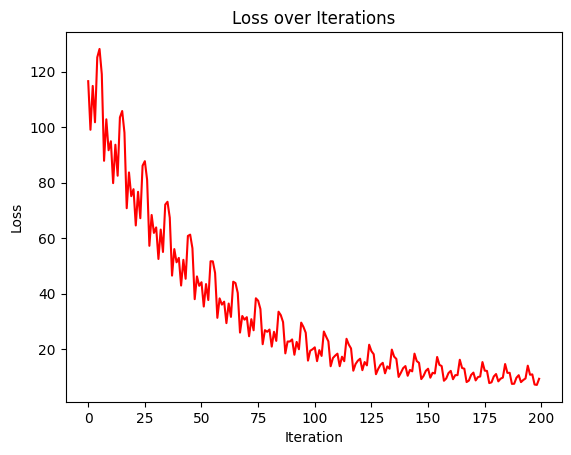

In [53]:
# Perform mini-batch gradient descent
mbgd_thetas, losses = mini_batch_gradient_descent(X_b, y, n_epochs=50, minibatch_size=20, learning_rate=0.01)

# Plot the losses
x_axis = list(range(200))
plt.plot(x_axis, losses[:200], color="r")
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss over Iterations')
plt.show()

In [54]:
mbgd_thetas, losses = mini_batch_gradient_descent(X_b, y, n_epochs=50, minibatch_size = 20,
                                                  learning_rate=0.01)
print(round(sum(losses), 2))

8865.65


In [55]:
def batch_gradient_descent(X_b, y, n_epochs=100, learning_rate=0.01):
    # thetas = np.random.randn(4, 1) # uncomment this line for real application
    thetas = np.asarray([[1.16270837], [-0.81960489], [1.39501033], [0.29763545]])

    thetas_path = [thetas]
    losses = []

    for epoch in range(n_epochs):
        # Compute output
        output = X_b.dot(thetas)

        # Compute loss
        loss = (output - y) ** 2

        # Compute gradient
        gradient = 2 * X_b.T.dot(output - y) / len(X_b)

        # Update parameters
        thetas = thetas - learning_rate * gradient

        # Logging
        thetas_path.append(thetas)
        mean_loss = np.sum(loss) / len(X_b)
        losses.append(mean_loss)

    return thetas_path, losses

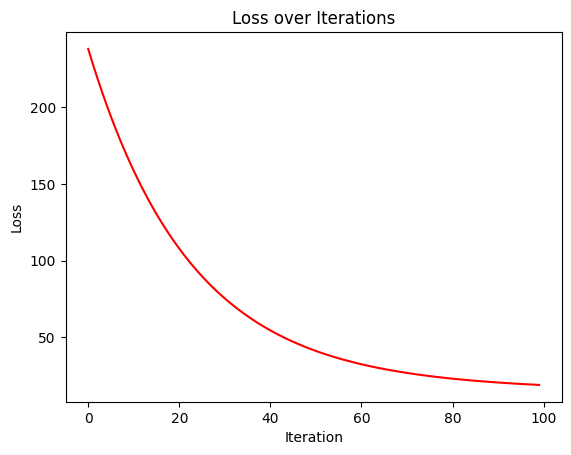

In [56]:
bgd_thetas, losses = batch_gradient_descent(X_b, y, n_epochs=100, learning_rate=0.01)
x_axis = list(range(100))
plt.plot(x_axis, losses[:100], color="r")
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss over Iterations')
plt.show()

In [57]:
bgd_thetas, losses = batch_gradient_descent(X_b, y, n_epochs=100, learning_rate=0.01)
print(round(sum(losses), 2))

6716.46


# Bài tập 2

In [58]:
!gdown 1J-5CIhfaQpSY_HuICuQJa6OvHzTQXj4Q

Downloading...
From: https://drive.google.com/uc?id=1J-5CIhfaQpSY_HuICuQJa6OvHzTQXj4Q
To: /content/BTC-Daily.csv
100% 257k/257k [00:00<00:00, 57.1MB/s]


In [59]:
import pandas as pd

df = pd.read_csv('/content/BTC-Daily.csv')

# Remove duplicate rows
df = df.drop_duplicates()
df

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1646092800,2022-03-01 00:00:00,BTC/USD,43221.71,43626.49,43185.48,43185.48,4.900629e+01,2.116360e+06
1,1646006400,2022-02-28 00:00:00,BTC/USD,37717.10,44256.08,37468.99,43178.98,3.160618e+03,1.364723e+08
2,1645920000,2022-02-27 00:00:00,BTC/USD,39146.66,39886.92,37015.74,37712.68,1.701817e+03,6.418008e+07
3,1645833600,2022-02-26 00:00:00,BTC/USD,39242.64,40330.99,38600.00,39146.66,9.127241e+02,3.573010e+07
4,1645747200,2022-02-25 00:00:00,BTC/USD,38360.93,39727.97,38027.61,39231.64,2.202852e+03,8.642149e+07
...,...,...,...,...,...,...,...,...,...
2646,1417478400,2014-12-02 00:00:00,BTC/USD,378.39,382.86,375.23,379.25,2.593576e+06,6.832530e+03
2647,1417392000,2014-12-01 00:00:00,BTC/USD,376.40,382.31,373.03,378.39,2.520662e+06,6.660560e+03
2648,1417305600,2014-11-30 00:00:00,BTC/USD,376.57,381.99,373.32,373.34,1.145567e+06,3.046330e+03
2649,1417219200,2014-11-29 00:00:00,BTC/USD,376.42,386.60,372.25,376.72,2.746157e+06,7.245190e+03


2014-11-28 to 2022-03-01


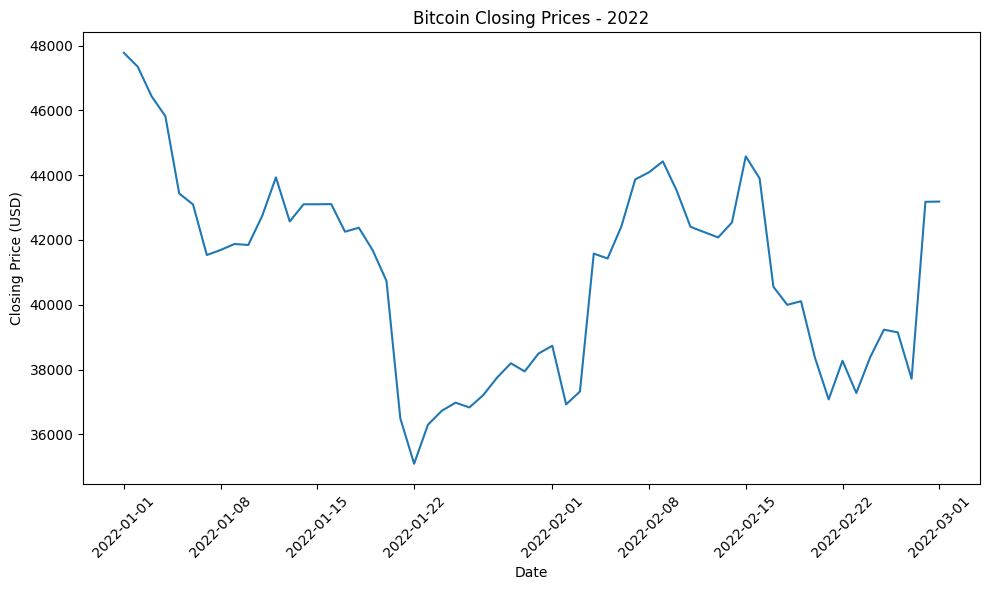

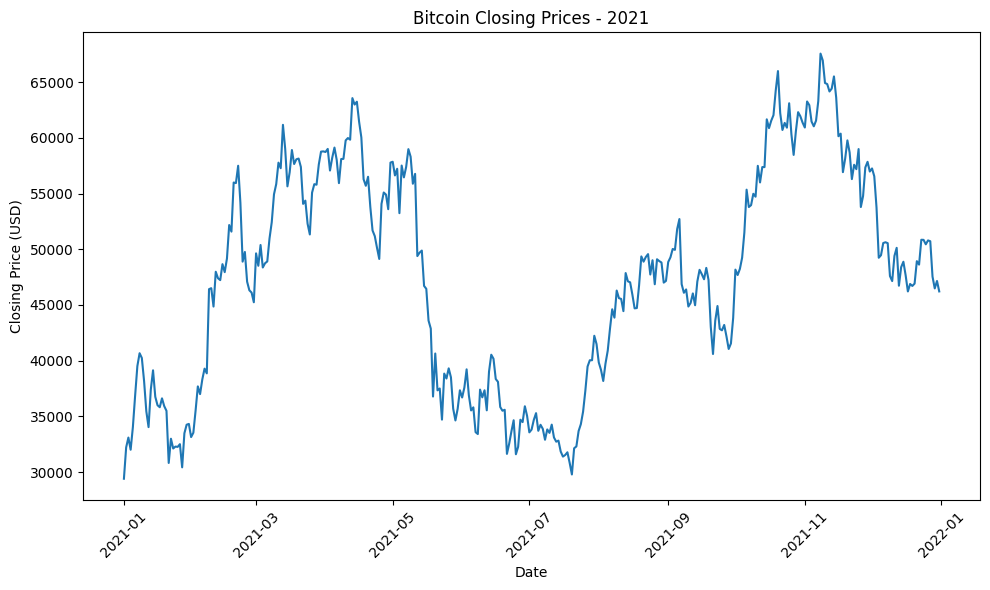

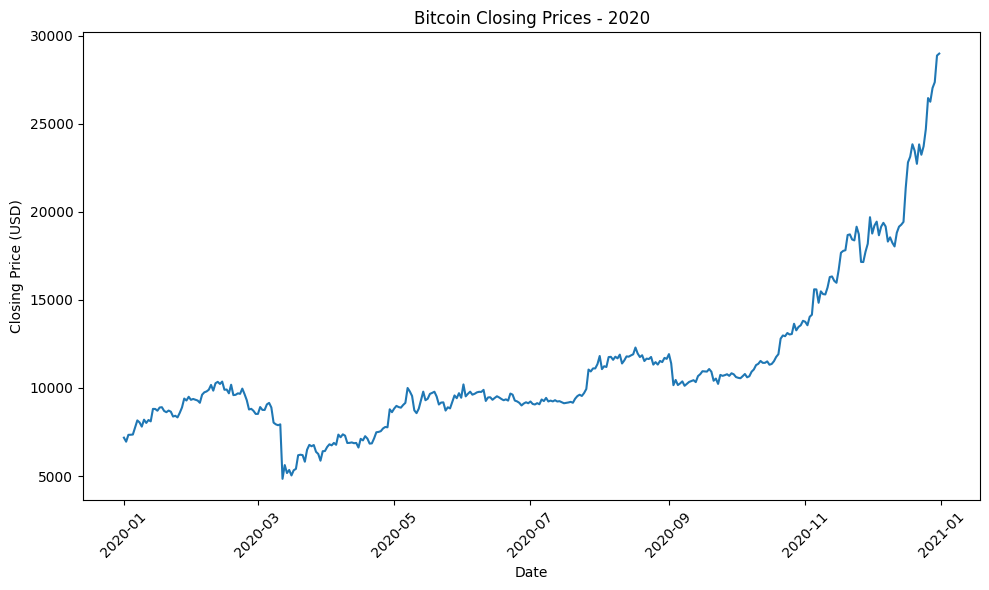

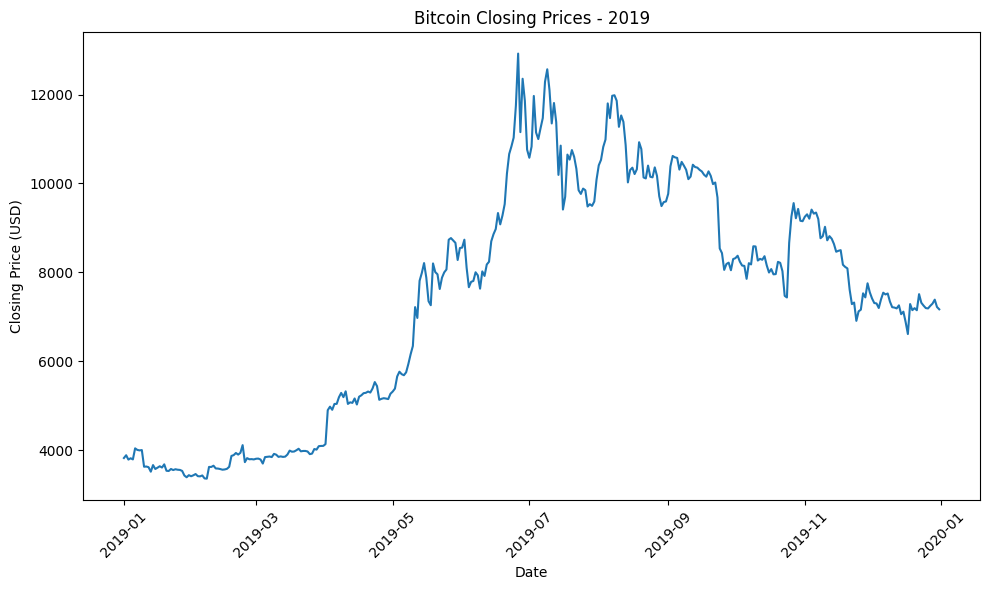

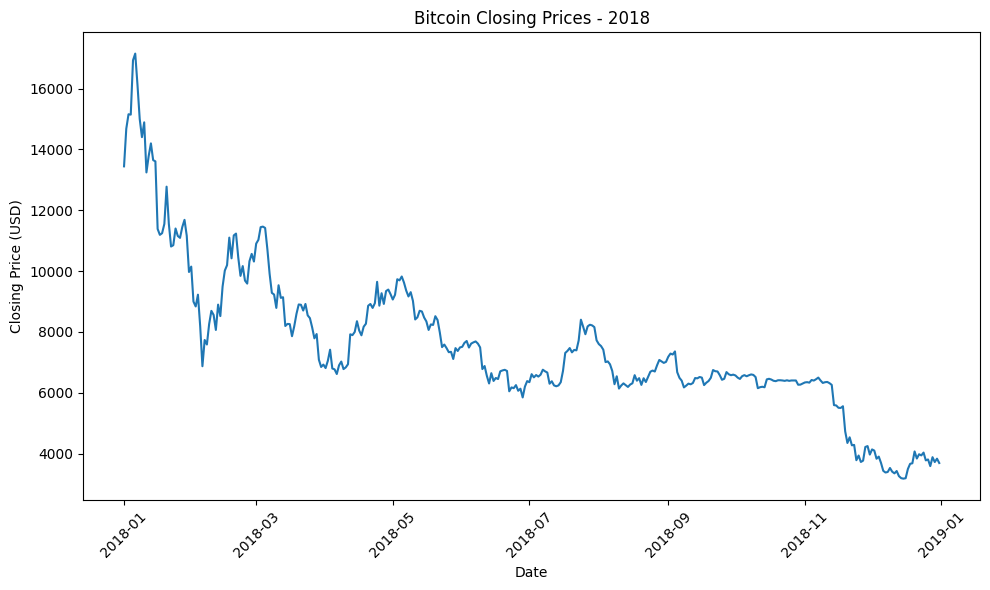

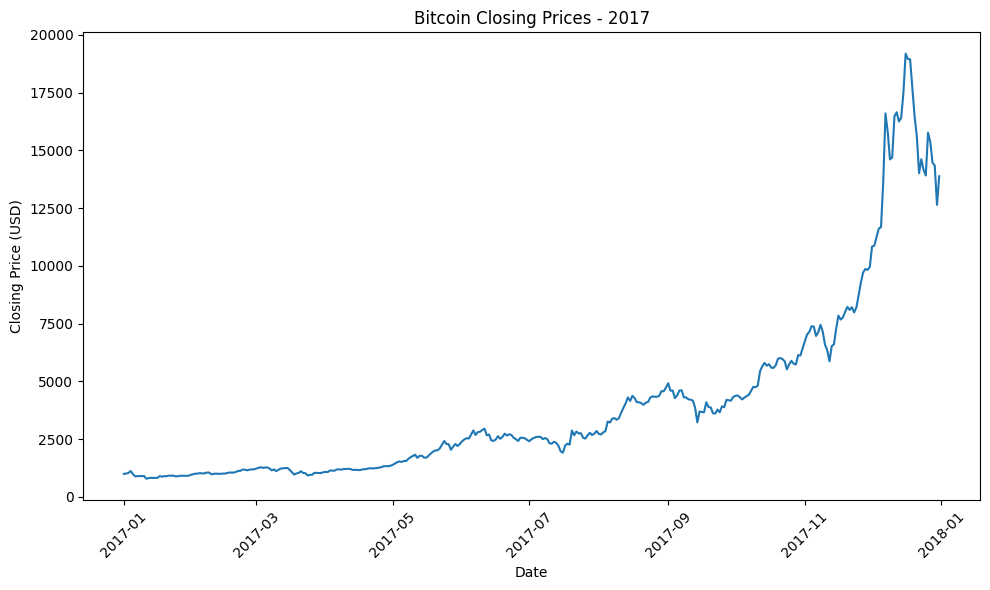

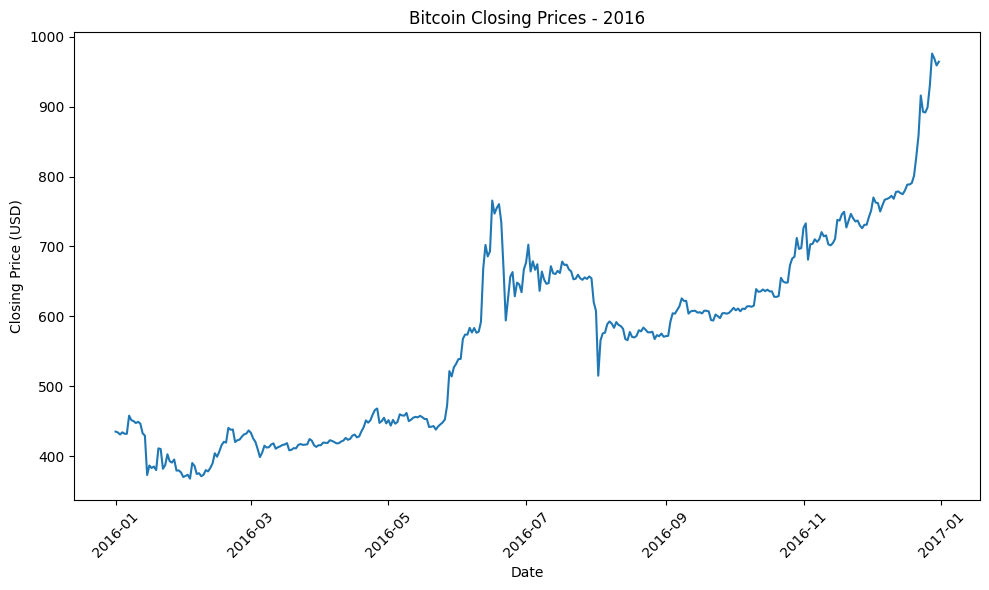

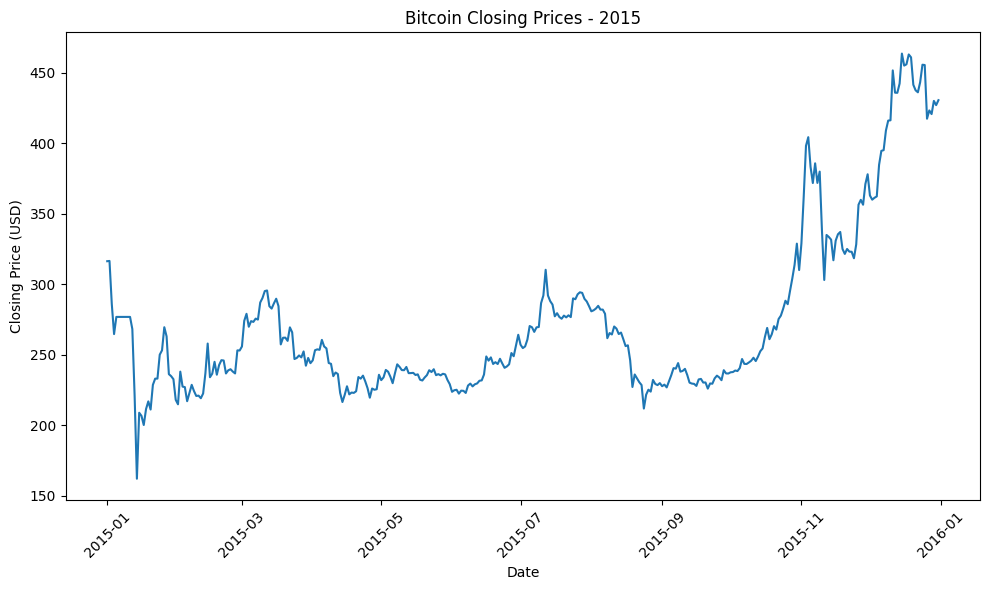

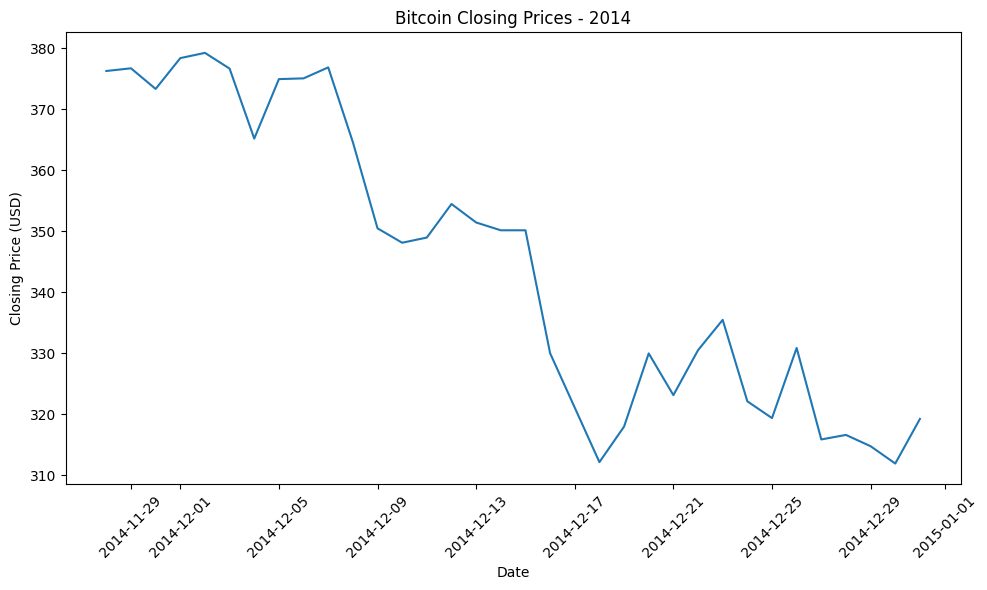

In [60]:
# Xác định khoảng thời gian
df['date'] = pd.to_datetime(df['date'])
date_range = str(df['date'].dt.date.min()) + ' to ' + str(df['date'].dt.date.max())
print(date_range)

# Xác định các năm duy nhất trong dữ liệu
unique_years = df['date'].dt.year.unique()

# Lặp qua các năm và vẽ biểu đồ
for year in unique_years:
    year_data = df[df['date'].dt.year == year]
    plt.figure(figsize=(10, 6))
    plt.plot(year_data['date'], year_data['close'])
    plt.title(f'Bitcoin Closing Prices - {year}')
    plt.xlabel('Date')
    plt.ylabel('Closing Price (USD)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [61]:
 !pip install mplfinance

<ipython-input-62-0bb5af4eef54>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['date'] = df_filtered['date'].map(mdates.date2num)


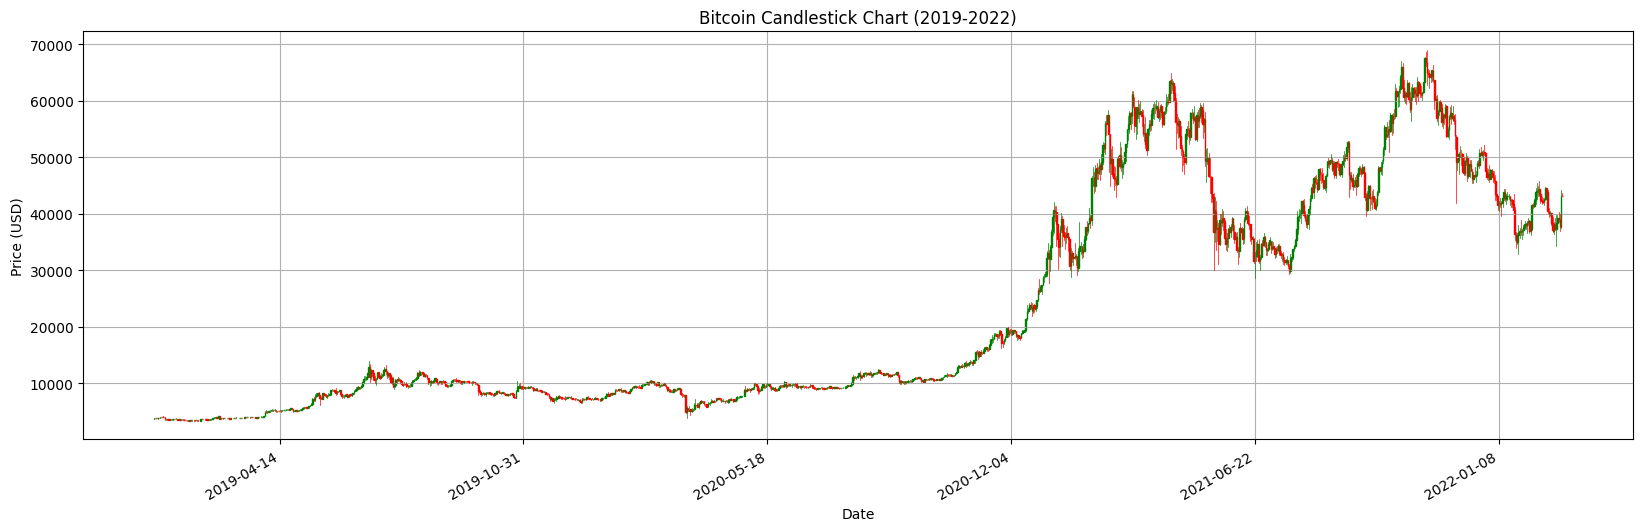

In [62]:
import matplotlib.dates as mdates
from mplfinance.original_flavor import candlestick_ohlc

# Filter data for 2019-2022
df_filtered = df[(df['date'] >= '2019-01-01') & (df['date'] <= '2022-12-31')]

# Convert date to matplotlib format
df_filtered['date'] = df_filtered['date'].map(mdates.date2num)

# Create the candlestick chart
fig, ax = plt.subplots(figsize=(20, 6))

candlestick_ohlc(ax, df_filtered[['date', 'open', 'high', 'low', 'close']].values,
                 width=0.6, colorup='g', colordown='r')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
fig.autofmt_xdate()

plt.title('Bitcoin Candlestick Chart (2019-2022)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)

# Save the plot as a PDF
plt.savefig('bitcoin_candlestick_2019_2022.pdf')

plt.show()

In [63]:
def predict(X, w, b):
    # Hàm dự đoán dựa trên trọng số w và bias b
    return X.dot(w) + b

def gradient(y_hat, y, X):
    # Hàm tính gradient dựa trên sự khác biệt giữa giá trị dự đoán và giá trị thực tế
    loss = y_hat - y
    dw = X.T.dot(loss) / len(y)
    db = np.sum(loss) / len(y)
    cost = np.sum(loss ** 2) / (2 * len(y))
    return dw, db, cost

def update_weight(w, b, lr, dw, db):
    # Hàm cập nhật trọng số w và bias b dựa trên gradient
    w_new = w - lr * dw
    b_new = b - lr * db
    return w_new, b_new

In [64]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Tạo đối tượng chuẩn hóa dữ liệu
scaler = StandardScaler()

df["Standardized_Close_Prices"] = scaler.fit_transform(df["close"].values.reshape(-1, 1))
df["Standardized_Open_Prices"] = scaler.fit_transform(df["open"].values.reshape(-1, 1))
df["Standardized_High_Prices"] = scaler.fit_transform(df["high"].values.reshape(-1, 1))
df["Standardized_Low_Prices"] = scaler.fit_transform(df["low"].values.reshape(-1, 1))

# Chia dữ liệu sau khi chuẩn hóa
X = df[['Standardized_Open_Prices', 'Standardized_High_Prices', 'Standardized_Low_Prices']]  # Các cột đầu vào đã chuẩn hóa
y = df['Standardized_Close_Prices']  # Cột mục tiêu đã chuẩn hóa và là vector cột

# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

# In ra dữ liệu đã chuẩn hóa
display(X_train)
display(y_train)

,Standardized_Open_Prices,Standardized_High_Prices,Standardized_Low_Prices
230,1.293487,1.259145,1.291275
1778,-0.646403,-0.647019,-0.643995
889,-0.123390,-0.134832,-0.209893
1968,-0.681095,-0.682483,-0.679872
1317,-0.264279,-0.253259,-0.249863
...,...,...,...
1638,-0.455834,-0.451939,-0.464171
1095,-0.484846,-0.491143,-0.479566
1130,-0.499847,-0.500755,-0.493787
1294,-0.337988,-0.323257,-0.325193


,Standardized_Close_Prices
230,1.296955
1778,-0.645384
889,-0.194873
1968,-0.681454
1317,-0.245070
...,...
1638,-0.449194
1095,-0.485193
1130,-0.500851
1294,-0.333973


In [65]:
def linear_regression_vectorized(X, y, learning_rate=0.01, num_iterations=200):
    n_samples, n_features = X.shape
    w = np.zeros(n_features)  # Khởi tạo trọng số
    b = 0  # Khởi tạo bias
    losses = []  # Để lưu lại giá trị hàm mất mát

    # Huấn luyện sử dụng Batch Gradient Descent
    for _ in range(num_iterations):
        # Dự đoán giá trị
        y_hat = predict(X, w, b)

        # Tính gradient và mất mát
        dw, db, cost = gradient(y_hat, y, X)

        # Cập nhật trọng số và bias
        w, b = update_weight(w, b, learning_rate, dw, db)

        # Lưu giá trị mất mát
        losses.append(cost)

    return w, b, losses

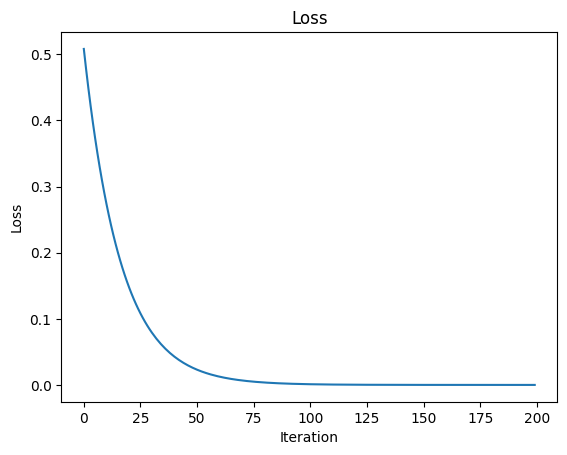

In [66]:
w, b, losses = linear_regression_vectorized(X_train.values, y_train.values,
                                            learning_rate=0.01, num_iterations=200)

plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss')
plt.show()

In [67]:
from sklearn.metrics import r2_score

# Make predictions on the test set
y_pred = predict(X_test, w, b)

# Calculate RMSE
rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))

# Calculate MAE
mae = np.mean(np.abs(y_pred - y_test))

# Calculate MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Calculate R-squared on training data
y_train_pred = predict(X_train, w, b)
train_accuracy = r2_score(y_train, y_train_pred)

# Calculate R-squared on testing data
test_accuracy = r2_score(y_test, y_pred)

# Print the results
print("Root Mean Square Error (RMSE):", round(rmse, 4))
print("Mean Absolute Error (MAE):", round(mae, 4))
print("Mean Absolute Percentage Error (MAPE):", round(mape, 4))
print("Training Accuracy (R-squared):", round(train_accuracy, 4))
print("Testing Accuracy (R-squared):", round(test_accuracy, 4))

Root Mean Square Error (RMSE): 0.0293
Mean Absolute Error (MAE): 0.0138
Mean Absolute Percentage Error (MAPE): 5.8325
Training Accuracy (R-squared): 0.9989
Testing Accuracy (R-squared): 0.9991


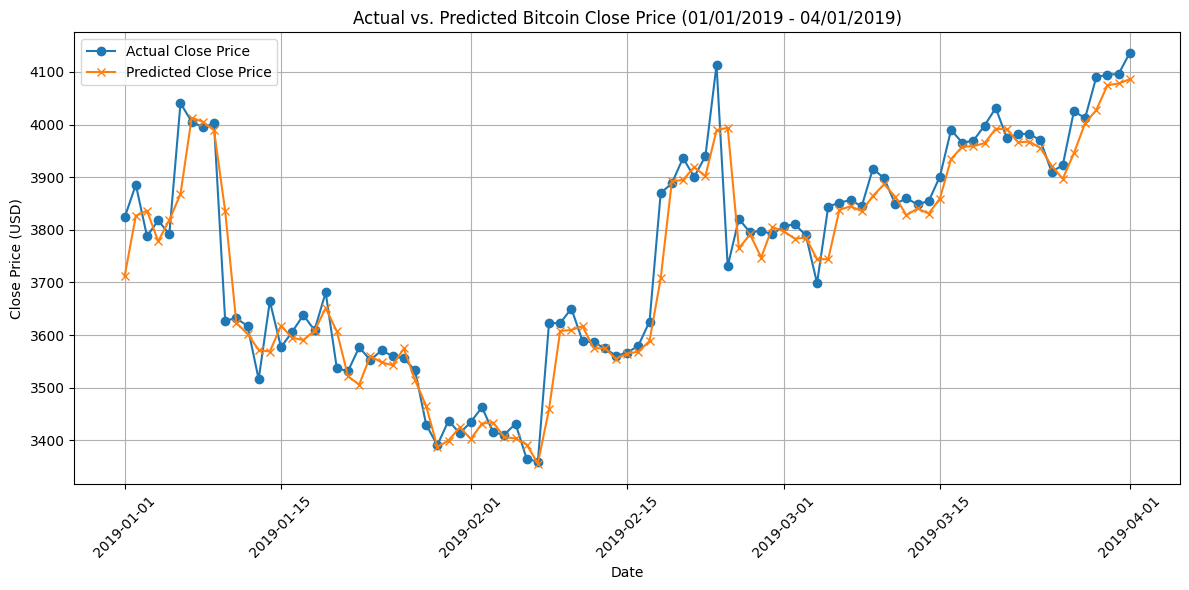

In [68]:
# Filter data for 2019-01-01 to 2019-04-01
df_2019_q1 = df[(df['date'] >= '2019-01-01') & (df['date'] <= '2019-04-01')]

# Prepare X and y for prediction
X_2019_q1 = df_2019_q1[["open", "high", "low"]]
y_2019_q1_actual = df_2019_q1["close"]

# Predict using the model
y_2019_q1_pred = predict(X_2019_q1, w, b)

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(df_2019_q1['date'], y_2019_q1_actual, label='Actual Close Price', marker='o')
plt.plot(df_2019_q1['date'], y_2019_q1_pred, label='Predicted Close Price', marker='x')
plt.title('Actual vs. Predicted Bitcoin Close Price (01/01/2019 - 04/01/2019)')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()